# Exploratory Data Analysis for the captions

Import libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Some Matplotlib configuration:

In [3]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 15 }
plt.rc('font', **font)

Import the config file which contains all the paths:

In [4]:
import sys

In [5]:
sys.path.append('..')

In [6]:
import config

**Captions**

In [7]:
config.DEV_CAPTIONS

'/datasets/dev-set/dev-set_video-captions.txt'

In [8]:
dev_captions = pd.read_csv(config.DEV_CAPTIONS, sep = '\t', header=None, names=['video', 'caption'] )

In [9]:
dev_captions.shape

(8000, 2)

In [10]:
dev_captions.head()

,video,caption
0,video10.webm,couple-relaxing-on-picnic-crane-shot
1,video100.webm,cute-black-and-white-cats-in-cage-at-animal-sh...
2,video10000.webm,owl-in-tree-close-up
3,video10001.webm,around-the-house-on-a-laptop
4,video10002.webm,beautiful-young-girl-with-apple


In [10]:
# dev_captions.set_index('video', inplace=True)

In [11]:
# dev_captions.head()

In [12]:
dev_captions.iloc[0, :]

video                              video10.webm
caption    couple-relaxing-on-picnic-crane-shot
Name: 0, dtype: object

In [13]:
dev_captions["caption"].head()

0                 couple-relaxing-on-picnic-crane-shot
1    cute-black-and-white-cats-in-cage-at-animal-sh...
2                                 owl-in-tree-close-up
3                         around-the-house-on-a-laptop
4                      beautiful-young-girl-with-apple
Name: caption, dtype: object

In [14]:
dev_captions["caption"] = dev_captions["caption"].str.split('-').apply(' '.join)

In [15]:
dev_captions["caption"].head()

0                 couple relaxing on picnic crane shot
1    cute black and white cats in cage at animal sh...
2                                 owl in tree close up
3                         around the house on a laptop
4                      beautiful young girl with apple
Name: caption, dtype: object

**Groundtruth**

In [13]:
dev_ground_truth = pd.read_csv(config.DEV_GROUNDTRUTH) 

In [14]:
# dev_ground_truth.set_index('video', inplace=True)

Merging both datasets:

In [15]:
dev_captions = dev_captions.merge(dev_ground_truth)

In [16]:
dev_captions.head()

,video,caption,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video10.webm,couple-relaxing-on-picnic-crane-shot,0.950,34,0.900,10
1,video100.webm,cute-black-and-white-cats-in-cage-at-animal-sh...,0.951,33,0.889,9
2,video10000.webm,owl-in-tree-close-up,0.832,33,1.000,13
3,video10001.webm,around-the-house-on-a-laptop,0.865,33,0.727,11
4,video10002.webm,beautiful-young-girl-with-apple,0.899,59,0.792,24


Top captions based on the memorability scores:

In [20]:
N = 10
print('** Top-{} Ranking **'.format(N))
for i, row in enumerate(dev_captions.sort_values('short-term_memorability', ascending=False).iloc[0:N, :]['caption']):
    print('{}. {}'.format(i + 1, row))

** Top-10 Ranking **
1. camera moves in on beared man with shovel taking a breather with truck in b
2. happy stylish elegant young couple welcoming in the new year with sparklers looking at the camera with warm friendly smiles against winkling party lights
3. mather and daughter enjoying a movie on tablet
4. two rehabilitated seals heading down beach towards the water
5. young asian woman during snowfall slowmotion
6. funny little boy sitting at desk eating apple and drawing
7. astronaut in outer space against the backdrop of the planet earth elements of this image furnished by nasa
8. head of big yellow eel
9. khr western unloadinggun
10. afro american girl on roller skates


In [21]:
N = 10
print('** Top-{} Ranking **'.format(N))
for i, row in enumerate(dev_captions.sort_values('long-term_memorability', ascending=False).iloc[0:N, :]['caption']):
    print('{}. {}'.format(i + 1, row))

** Top-10 Ranking **
1. steadicamof two healthy men peddling with cycling road bicycle at sunset
2. young woman coming to the elevator calling it waiting and entering the second one when it coming
3. playing puppies
4. videoblocks front view of the manager leading the truck arrival to the warehouse
5. slow motion tennis forehand volley
6. young girl is travelling by a high speed train
7. two civil war union soldiers stationed by barn
8. rear view of sportsman and sportswoman running along riverside with beautiful view
9. close upof male hand with syringe and drip sick person or drug addict in hospital of free medical care his fingers start moving as sign of hope for better future
10. slow motionof a woman wanting her man to follow her in vacation or honeymoon to beach by the ocean


**Wordclouds using the Top Captions (high memorability scores)**

In [22]:
from wordcloud import WordCloud, STOPWORDS

In [23]:
N = 50
top_words_short_term = ' '.join(dev_captions.sort_values('short-term_memorability', 
                                                         ascending=False).iloc[0:N, :]['caption'])

In [24]:
top_words_long_term = ' '.join(dev_captions.sort_values('long-term_memorability', 
                                                        ascending=False).iloc[0:N, :]['caption'])

In [25]:
wordcloud_top_short_term = WordCloud(max_words=50, 
                                 width=800, height=400,
                                 background_color="white", 
                                 color_func=(lambda *args, **kwargs: (0, 255, 0))
                                 ).generate(top_words_short_term)

In [26]:
wordcloud_top_long_term = WordCloud(max_words=50, 
                                width=800, height=400,
                                background_color="white", 
                                color_func=(lambda *args, **kwargs: (0, 0, 255))
                                ).generate(top_words_long_term)

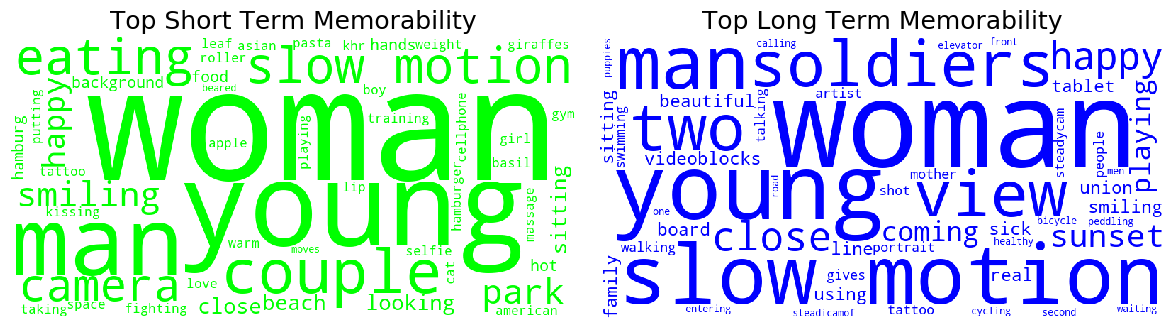

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=100)
ax0, ax1 = axes.flatten()

ax0.imshow(wordcloud_top_short_term)
ax0.set_title('Top Short Term Memorability')
ax0.axis('off')

ax1.imshow(wordcloud_top_long_term)
ax1.set_title('Top Long Term Memorability')
ax1.axis('off')

fig.tight_layout()
plt.savefig('../../figures/Exploring_Wordclouds_Top_{}_Videos_Captions.png'.format(N), bbox_inches='tight')
plt.show()

**Wordclouds using the Bottom Captions (low memorability scores)**

In [28]:
N = 50
bottom_words_short_term = ' '.join(dev_captions.sort_values('short-term_memorability', 
                                                            ascending=True).iloc[0:N, :]['caption'])

In [29]:
bottom_words_long_term = ' '.join(dev_captions.sort_values('long-term_memorability', 
                                                           ascending=True).iloc[0:N, :]['caption'])

In [30]:
wordcloud_bottom_short_term = WordCloud(max_words=50, 
                                        width=800, height=400,
                                        background_color="white", 
                                        color_func=(lambda *args, **kwargs: (0, 255, 0))
                                       ).generate(bottom_words_short_term)

In [31]:
wordcloud_bottom_long_term = WordCloud(max_words=50, 
                                       width=800, height=400,
                                       background_color="white", 
                                       color_func=(lambda *args, **kwargs: (0, 0, 255))
                                      ).generate(bottom_words_long_term)

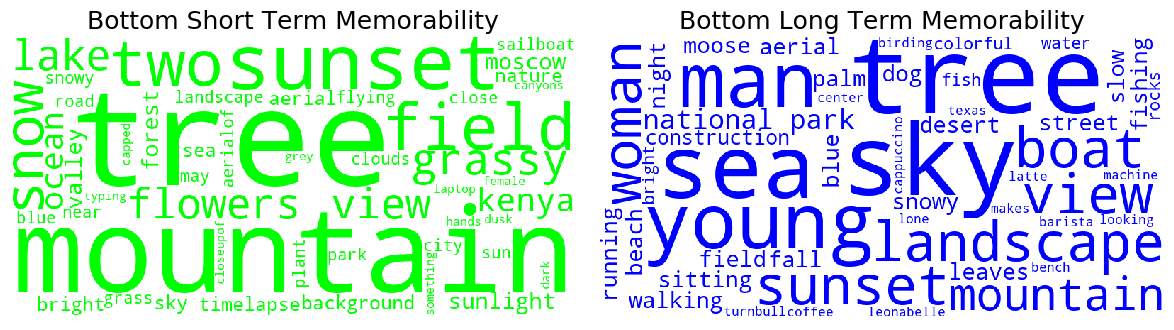

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=100)
ax0, ax1 = axes.flatten()

ax0.imshow(wordcloud_bottom_short_term)
ax0.set_title('Bottom Short Term Memorability')
ax0.axis('off')

ax1.imshow(wordcloud_bottom_long_term)
ax1.set_title('Bottom Long Term Memorability')
ax1.axis('off')

fig.tight_layout()
plt.savefig('../../figures/Exploring_Wordclouds_Bottom_{}_Videos_Captions.png'.format(N), bbox_inches='tight')
plt.show()

In [39]:
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
bow = TfidfVectorizer(max_features=1000, lowercase=True, ngram_range=(1,2), analyzer = "word")

In [41]:
kf = KFold(n_splits=10)

In [ ]:
train_caption = train_bow.transform(X_train['caption'])
test_caption = train_bow.transform(X_test['caption'])
return train_caption, test_caption

In [43]:
target_cols = [
    'short-term_memorability',
    'long-term_memorability',
    'nb_short-term_annotations', 
    'nb_long-term_annotations',
]

In [60]:
dev_captions.head()

,video,caption,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video10.webm,couple relaxing on picnic crane shot,0.950,34,0.900,10
1,video100.webm,cute black and white cats in cage at animal sh...,0.951,33,0.889,9
2,video10000.webm,owl in tree close up,0.832,33,1.000,13
3,video10001.webm,around the house on a laptop,0.865,33,0.727,11
4,video10002.webm,beautiful young girl with apple,0.899,59,0.792,24


In [61]:
training_set =  dev_captions.drop(columns=target_cols)

In [62]:
training_set.head()

,video,caption
0,video10.webm,couple relaxing on picnic crane shot
1,video100.webm,cute black and white cats in cage at animal sh...
2,video10000.webm,owl in tree close up
3,video10001.webm,around the house on a laptop
4,video10002.webm,beautiful young girl with apple


In [63]:
train_bow = bow.fit(training_set['caption'])

In [64]:
train_bow

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [68]:
train_bow.transform(['man woman incredible friends'])

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [69]:
train_caption = train_bow.transform(training_set['caption'])

In [70]:
train_caption

<8000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 65386 stored elements in Compressed Sparse Row format>